In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
df.shape

(1000, 3)

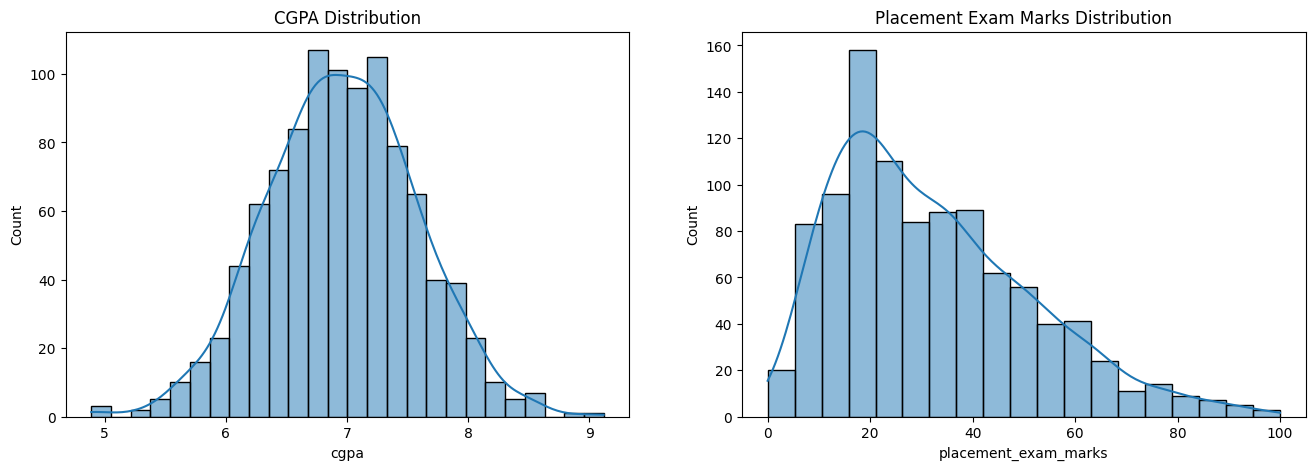

In [9]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Placement Exam Marks Distribution')

plt.show()


In [11]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [16]:
print("mean value of cgpa:",df["cgpa"].mean())
print("sd value of cgpa:",df["cgpa"].std())
print("min value of cgpa:",df["cgpa"].min())
print("max value of cgpa:",df["cgpa"].max())

mean value of cgpa: 6.96124
sd value of cgpa: 0.6158978751323896
min value of cgpa: 4.89
max value of cgpa: 9.12


In [20]:
print("highest allowed",df["cgpa"].mean()+3*df["cgpa"].std())
print("lowest allowed",df["cgpa"].mean()-3*df["cgpa"].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [21]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimmming 


In [22]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Capping


In [23]:
upper_limit=df["cgpa"].mean()+3*df["cgpa"].std()
lower_limit=df["cgpa"].mean()-3*df["cgpa"].std()

In [24]:
upper_limit

np.float64(8.808933625397168)

In [25]:
df['cgpa']=np.where(df['cgpa']>upper_limit,
                    upper_limit,
                    np.where(df['cgpa']<lower_limit,
                    lower_limit,
                            df['cgpa'])
                   )

In [28]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64